In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Our dataset is divided into two parts: Easy and Challenge.

For each part we have train, dev and test set.

In [2]:
df_easy_train = pd.read_csv('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC-Easy/ARC-Easy-Train.csv')
df_easy_dev = pd.read_csv('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC-Easy/ARC-Easy-Dev.csv')
df_easy_test = pd.read_csv('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC-Easy/ARC-Easy-Test.csv')

In [3]:
df_challenge_train = pd.read_csv('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC-Challenge/ARC-Challenge-Train.csv')
df_challenge_dev = pd.read_csv('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC-Challenge/ARC-Challenge-Dev.csv')
df_challenge_test = pd.read_csv('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC-Challenge/ARC-Challenge-Test.csv')

In [4]:
print(f'Shape of train easy dataset is {df_easy_train.shape}')
print(f'Shape of dev easy dataset is {df_easy_dev.shape}')
print(f'Shape of test easy dataset is {df_easy_test.shape}')

Shape of train easy dataset is (2251, 12)
Shape of dev easy dataset is (570, 12)
Shape of test easy dataset is (2376, 12)


In [5]:
print(f'Shape of train challenge dataset is {df_challenge_train.shape}')
print(f'Shape of dev challenge dataset is {df_challenge_dev.shape}')
print(f'Shape of test challenge dataset is {df_challenge_test.shape}')

Shape of train challenge dataset is (1119, 12)
Shape of dev challenge dataset is (299, 12)
Shape of test challenge dataset is (1172, 12)


Here we can see that both datasets have almost same size for train and test sets.

In [6]:
df_easy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   questionID                2251 non-null   object 
 1   originalQuestionID        2251 non-null   object 
 2   totalPossiblePoint        2251 non-null   int64  
 3   AnswerKey                 2251 non-null   object 
 4   isMultipleChoiceQuestion  2251 non-null   int64  
 5   includesDiagram           2251 non-null   int64  
 6   examName                  2251 non-null   object 
 7   schoolGrade               2251 non-null   int64  
 8   year                      2251 non-null   object 
 9   question                  2251 non-null   object 
 10  subject                   0 non-null      float64
 11  category                  2251 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 211.2+ KB


Information regarding above columns are as follows:

* **questionID:** Unique identifier for the question.
* **originalQuestionID:** Legacy ID used within AI2.
* **totalPossiblePoint:** The point value of the question for grading purposes.
* **AnswerKey:** The letter signifying the correct answer option for the question.
* **isMultipleChoice:** 1 indicates the question is multiple choice.
* **includesDiagram:** 0 indicates the question does not include a diagram.
* **examName:** The name of the source exam for these questions.
* **schoolGrade:** The intended grade level for the question.
* **year:** The year the questions were sourced for AI2.
* **question:** The question and its answer options. Each answer option is indicated by a letter in parentheses, e.g., (A) and (B).
* **subject:** The question's subject; this is left blank in this data set.
* **category:** Whether the question is a Train, Dev, or Test question.


In [7]:
df_easy_train.head(5)

,questionID,originalQuestionID,totalPossiblePoint,AnswerKey,isMultipleChoiceQuestion,includesDiagram,examName,schoolGrade,year,question,subject,category
0,Mercury_7220990,7220990,1,B,1,0,Mercury,8,2015,Which factor will most likely cause a person t...,NaN,Train
1,MCAS_2007_8_5189,5189,1,B,1,0,MCAS,8,2007,Lichens are symbiotic organisms made of green ...,NaN,Train
2,Mercury_SC_401169,401169,1,D,1,0,Mercury,5,2015,When a switch is used in an electrical circuit...,NaN,Train
3,MCAS_2004_8_27,27,1,A,1,0,MCAS,8,2004,Which of the following is an example of an ass...,NaN,Train
4,NYSEDREGENTS_2006_8_10,10,1,3,1,0,NYSEDREGENTS,8,2006,"Rocks are classified as igneous, metamorphic, ...",NaN,Train


From the above table we can see that many columns are not useful for our analysis. Thus we will removing them.

In [8]:
df_easy_train.columns

Index(['questionID', 'originalQuestionID', 'totalPossiblePoint', 'AnswerKey',
       'isMultipleChoiceQuestion', 'includesDiagram', 'examName',
       'schoolGrade', 'year', 'question', 'subject', 'category'],
      dtype='object')

In [9]:
imp_columns = ['AnswerKey','isMultipleChoiceQuestion','includesDiagram','question']

df_easy_train = df_easy_train[imp_columns]
df_easy_dev = df_easy_dev[imp_columns]
df_easy_test = df_easy_test[imp_columns]

df_challenge_train = df_challenge_train[imp_columns]
df_challenge_dev = df_challenge_dev[imp_columns]
df_challenge_test = df_challenge_test[imp_columns]

# isMultipleChoiceQuestion.

In [10]:
print(f'Number of unique values in easy train set of this column is {df_easy_train.isMultipleChoiceQuestion.unique()}')
print(f'Number of unique values in easy test set of this column is {df_easy_test.isMultipleChoiceQuestion.unique()}')

Number of unique values in easy train set of this column is [1]
Number of unique values in easy test set of this column is [1]


In [11]:
print(f'Number of unique values in challenge train set of this column is {df_challenge_train.isMultipleChoiceQuestion.unique()}')
print(f'Number of unique values in challenge test set of this column is {df_challenge_test.isMultipleChoiceQuestion.unique()}')

Number of unique values in challenge train set of this column is [1]
Number of unique values in challenge test set of this column is [1]


Here we can see that there is only one unique value in this columns. Thus we will be removing it.

# includesDiagram.

In [12]:
print(f'Number of unique values in easy train set of this column is {df_easy_train.includesDiagram.unique()}')
print(f'Number of unique values in easy test set of this column is {df_easy_test.includesDiagram.unique()}')

Number of unique values in easy train set of this column is [0]
Number of unique values in easy test set of this column is [0]


In [13]:
print(f'Number of unique values in challenge train set of this column is {df_challenge_train.includesDiagram.unique()}')
print(f'Number of unique values in challenge test set of this column is {df_challenge_test.includesDiagram.unique()}')

Number of unique values in challenge train set of this column is [0]
Number of unique values in challenge test set of this column is [0]


This column also has a single unqiue column. Thus we will be removing it too.

In [14]:
df_easy_train = df_easy_train.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_easy_dev = df_easy_dev.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_easy_test = df_easy_test.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)

df_challenge_train = df_challenge_train.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_challenge_dev = df_challenge_dev.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)
df_challenge_test = df_challenge_test.drop(['isMultipleChoiceQuestion','includesDiagram'], axis=1)

In [15]:
df_easy_train.columns

Index(['AnswerKey', 'question'], dtype='object')

# question.

In [ ]:
df_easy_train['question'].iloc[0]

'Which factor will most likely cause a person to develop a fever?  (A) a leg muscle relaxing after exercise (B) a bacterial population in the bloodstream (C) several viral particles on the skin (D) carbohydrates being digested in the stomach'

In [ ]:
df_easy_train['question'].iloc[1]

'Lichens are symbiotic organisms made of green algae and fungi. What do the green algae supply to the fungi in this symbiotic relationship? (A) carbon dioxide (B) food (C) protection (D) water'

In [ ]:
df_easy_train['question'].iloc[4]

'Rocks are classified as igneous, metamorphic, or sedimentary according to (1) their color (2) their shape (3) how they formed (4) the minerals they contain'

Above are some samples of the question's column.

**Observations:**

(1) In this we can see that both uppercase and lowercase letters are present.

(2) Question and the anwer options are separated by space only.

(3) Answer options are present in two formats: ABCD and 1234. We would need to take care of that.


We would need to add separator between question and answers. Also I will not be lowercasing the uppercased letters.


# AnswerKey.

In [ ]:
a = list(df_easy_train['AnswerKey'].unique())
print(f'Unique values in easy train set are {a}')

a = list(df_easy_test['AnswerKey'].unique())
print(f'Unique values in easy test set are {a}')

Unique values in easy train set are ['B', 'D', 'A', '3', 'C', '1', '2', '4', 'E']
Unique values in easy test set are ['A', 'B', 'D', 'C', '2', '4', '3', '1', 'E']


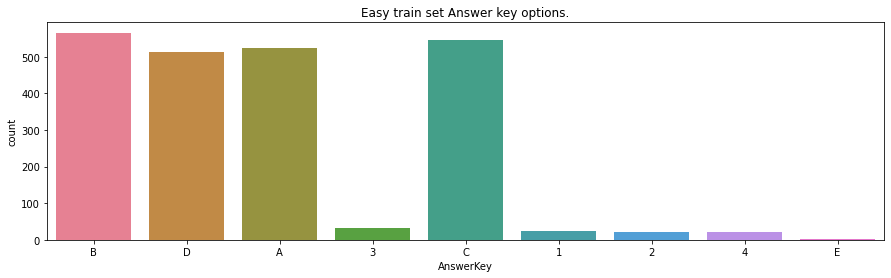

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Easy train set Answer key options.')
sns.countplot(x='AnswerKey', data=df_easy_train,palette="husl", ax=axis1)

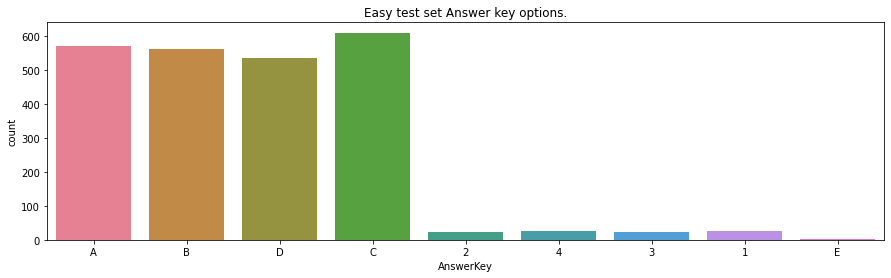

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Easy test set Answer key options.')
sns.countplot(x='AnswerKey', data=df_easy_test,palette="husl", ax=axis1)

In [ ]:
df_easy_train.loc[df_easy_train['AnswerKey']=='E']

,AnswerKey,question
1138,E,A mixture of powdered iron and sulfur is heate...
1941,E,Large amounts of metals like iron and aluminum...


In [ ]:
df_easy_test.loc[df_easy_test['AnswerKey']=='E']

,AnswerKey,question
1441,E,What happens when an animal hibernates? (A) Th...


In [ ]:
a = list(df_challenge_train['AnswerKey'].unique())
print(f'Unique values in challenge train set are {a}')

a = list(df_challenge_test['AnswerKey'].unique())
print(f'Unique values in challenge test set are {a}')

Unique values in challenge train set are ['A', 'B', 'D', 'C', '2', '4', '1', '3']
Unique values in challenge test set are ['C', 'B', 'D', 'A', '2', '4', '3', '1']


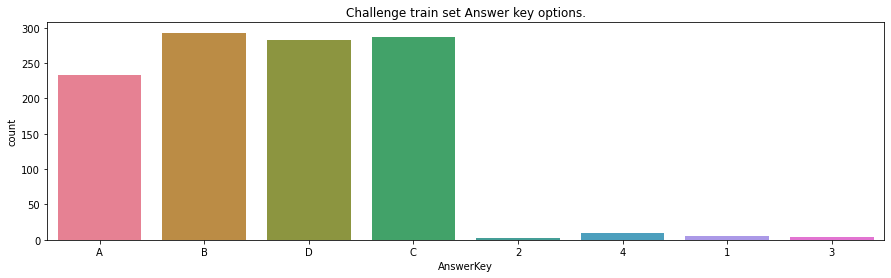

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Challenge train set Answer key options.')
sns.countplot(x='AnswerKey', data=df_challenge_train,palette="husl", ax=axis1)

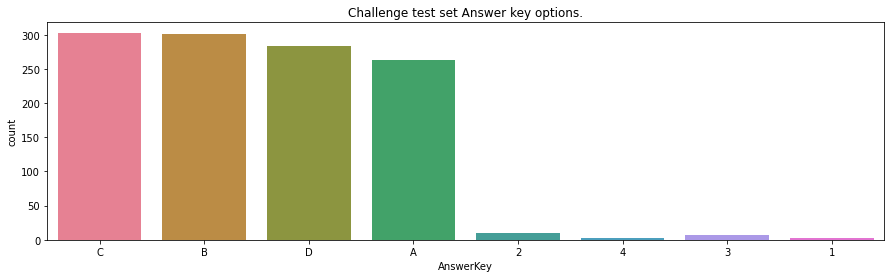

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))

plt.title('Challenge test set Answer key options.')
sns.countplot(x='AnswerKey', data=df_challenge_test,palette="husl", ax=axis1)

**Observations:**

(1) There are some questions in easy set which contain 'E' as an option.

(2) Challenge set does not contain any question with 'E' as an opiton.

(3) Questions with answers in format of 1234 are very low as compared to the ABCD format questions.

# Exploring the given corpus.

In [ ]:
file = open('/content/drive/My Drive/ARC-V1-Feb2018/ARC-V1-Feb2018-2/ARC_Corpus.txt','r')

In [ ]:
file.readlines()

['Of course, for many in the media, “hydrogen sulphide delivery helps prevent disease damage in cells in certain disease models” will always be trumped by “farts cure cancer” when it comes to headlines.\n',
 'The same problems apply with wolf-domestic dog hybrids.\n',
 'taking stock of delightful days\n',
 'The an- tlu-opologist and the ethnologist find in trop- ical America some of the most complicated and interesting problems of research.\n',
 'ORDER ODONATA (Damselflies and Dragonflies) Diagnosis: large, to over three inches long; four wings, transparent and membranous, held vertically (damselflies) or laterally (dragonflies) at rest; chew- ing mouth parts, tooth-like; nymphs aquatic, feeding on mosquito larvae to small fish; adults terrestrial, feeding on other insects (Figure 14.27).\n',
 'until they institute such safeguards and assurances of chaste maidenhood as characterize Hebrew social life?\n',
 'Sex brought the variations that could allow organisms to survive change” (2000,

**Observations:**


*   Many sentences in the corpus contain only digits.

*   Some senetences have http links present in them.

*   There are many short sentences in the corpus with length of 2-3 words.

*   Some sentences have special characters with no meaning.

*   There are many useless things in brackets.

*   There are many 1-2 letter words, which are not stopwords. Thus they ahve to be removed after extraction.

*   Some sentences contain only dates, location, etc.

*   There are some words which contain both digits and a letter. For eg, pp\xa0434–455, Apr;100, etc.


***We have to take care of above things after extracting sentences for a particular question.***





# Extracting only question part from the "question" column.

In [16]:
df_easy_train.head()

,AnswerKey,question
0,B,Which factor will most likely cause a person t...
1,B,Lichens are symbiotic organisms made of green ...
2,D,When a switch is used in an electrical circuit...
3,A,Which of the following is an example of an ass...
4,3,"Rocks are classified as igneous, metamorphic, ..."


In [25]:
def extract_question(question):
    '''
    This function will take a value in question column then, will split the string 
    at (A) or (1). After splitting we will take only first part which is the question.
    '''
    if '(A)' in question:
        x = question.split('(A)')[0]
    elif '(1)' in question:
        x = question.split('(1)')[0]

    return x

In [26]:
df_easy_train['only_question'] = df_easy_train['question'].apply(extract_question)

In [32]:
df_easy_dev['only_question'] = df_easy_dev['question'].apply(extract_question)
df_easy_test['only_question'] = df_easy_test['question'].apply(extract_question)
df_challenge_train['only_question'] = df_challenge_train['question'].apply(extract_question)
df_challenge_dev['only_question'] = df_challenge_dev['question'].apply(extract_question)
df_challenge_test['only_question'] = df_challenge_test['question'].apply(extract_question)

In [42]:
print('Some examples of questions of easy set are as follows:')
print('------------------------------------------------------\n')
a = np.random.randint(0,high=1000,size=10)

for i in a:
    b = df_easy_train['only_question'].iloc[i]
    print(b + '\n')

Some examples of questions of easy set are as follows:
------------------------------------------------------

A city has a temperature of 75 °F, with partly cloudy skies. Weather forecasters are predicting that the air pressure and temperature will drop during the day. Which type of weather is most likely for this area in the late afternoon? 

A geologist finds a layer of shale near the surface from a certain time period. Nearby, the geologist finds the same layer of shale, but it is deeper underground than the first layer. What might have caused the difference in the depth of the shale layer? 

After playing outside on a cold day, Jaime went inside to wash his hands. Although the water was normal temperature, he noticed that it felt warmer than usual. What would explain this phenomenon? 

Some birds fly south before winter each year. This is an example of 

According to the periodic table, all of the following are metals except 

Which of these statements about nonrenewable resources

In [43]:
#Adding length of a question as a new column.
df_easy_train['quesiton_length'] = df_easy_train['only_question'].apply(lambda x: len(x))

In [45]:
df_easy_dev['quesiton_length'] = df_easy_dev['only_question'].apply(lambda x: len(x))
df_easy_test['quesiton_length'] = df_easy_test['only_question'].apply(lambda x: len(x))
df_challenge_train['quesiton_length'] = df_challenge_train['only_question'].apply(lambda x: len(x))
df_challenge_dev['quesiton_length'] = df_challenge_dev['only_question'].apply(lambda x: len(x))
df_challenge_test['quesiton_length'] = df_challenge_test['only_question'].apply(lambda x: len(x))

Text(0.5, 1.0, 'Question lengths in Easy train part')

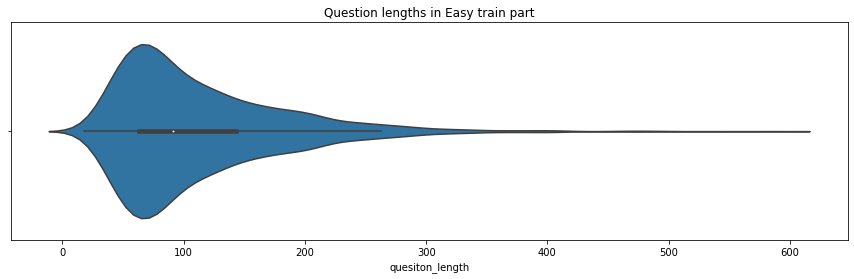

In [76]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.violinplot(x='quesiton_length', data=df_easy_train, ax=axis1, orient='v')
plt.title('Question lengths in Easy train part')

In [72]:
a = np.quantile(df_easy_train['quesiton_length'],0.99)
print(f'99 percentile values of question length in easy train part is less than {a}.')

count = 0 
for i in range(len(df_easy_train)):
    if df_easy_train['quesiton_length'].iloc[i] >= 339:
        count += 1

print(f'Number of questions in easy train part with length greater than 99 percentile are {count}.')

99 percentile values of question length in easy train part is less than 338.5.
Number of questions in easy train part with length greater than 99 percentile are 23.


Text(0.5, 1.0, 'Question lengths in Challenge train part')

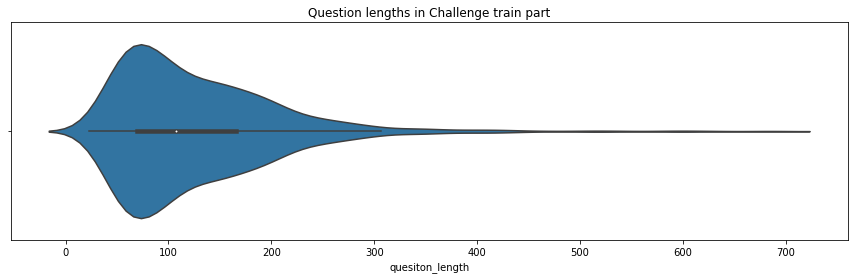

In [75]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.violinplot(x='quesiton_length', data=df_challenge_train, ax=axis1, orient='v')
plt.title('Question lengths in Challenge train part')

In [74]:
a = np.quantile(df_challenge_train['quesiton_length'],0.99)
print(f'99 percentile values of question length in challenge train part is less than {a}.')

count = 0 
for i in range(len(df_challenge_train)):
    if df_challenge_train['quesiton_length'].iloc[i] >= 415:
        count += 1

print(f'Number of questions in challenge train part with length greater than 99 percentile are {count}.')

99 percentile values of question length in challenge train part is less than 414.83999999999924.
Number of questions in challenge train part with length greater than 99 percentile are 12.


**Observations:**

(1) In easy train part most of the questions of length less than 100.

(2) In challenge train part there are many questions with large length.

(3) Questions with length greater than 400 are very less.

(4) In easy train part maximum question length is around 600 whereas in challenge it is around 700.

In [78]:
#Saving the newly created dataframes.
df_easy_train.to_csv('/content/drive/My Drive/ARC-V1-Feb2018/df_easy_train',index=False)
df_easy_dev.to_csv('/content/drive/My Drive/ARC-V1-Feb2018/df_easy_dev',index=False)
df_easy_test.to_csv('/content/drive/My Drive/ARC-V1-Feb2018/df_easy_test',index=False)

In [79]:
df_challenge_train.to_csv('/content/drive/My Drive/ARC-V1-Feb2018/df_challenge_train',index=False)
df_challenge_dev.to_csv('/content/drive/My Drive/ARC-V1-Feb2018/df_challenge_dev',index=False)
df_challenge_test.to_csv('/content/drive/My Drive/ARC-V1-Feb2018/df_challenge_test',index=False)